In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load Predicted price from CSV**


**Load Predicted price from CSV**


In [69]:

csv_data = pd.read_csv('Predictions.csv')
csv_data['Date'] = pd.to_datetime(csv_data['Date'])
csv_data.set_index('Date', inplace=True)

**Kaufman's Efficiency Ratio Calculation**

In [70]:
# Calculate efficient ratio
df = csv_data.copy()
df['price_change'] = df['Predicted Price'].diff()
df.dropna(inplace=True)

df['5 day change'] = df['Predicted Price'].diff(5)
df['change_abs'] = abs(df['price_change'])

df['5 day change sum'] = df['change_abs'].rolling(5).sum()
df.dropna(inplace=True)

df['eff_ratio'] = abs(df['5 day change']) / df['5 day change sum']

# Add a column indicating if the market is trending
df['Trending'] = df['eff_ratio'] > 0.5

# Display data
print(df)


            Unnamed: 0  Predicted Price  price_change  5 day change  \
Date                                                                  
2023-08-22           6       137.165422     -5.753340    -28.261348   
2023-08-23           7       144.959649      7.794227    -30.982512   
2023-08-24           8       188.352667     43.393018     25.831728   
2023-08-25           9       190.996095      2.643428     28.154444   
2023-08-28          10       193.221621      2.225526     50.302859   
2023-08-29          11       174.153964    -19.067658     36.988541   
2023-08-30          12       144.026669    -30.127295     -0.932981   
2023-08-31          13       176.466967     32.440299    -11.885700   
2023-09-01          14       183.823851      7.356883     -7.172245   
2023-09-05          15       174.921717     -8.902133    -18.299904   
2023-09-06          16       176.651621      1.729903      2.497657   
2023-09-07          17       165.076905    -11.574716     21.050236   
2023-0

**Plotting the Kaufman Efficiency Ratio**

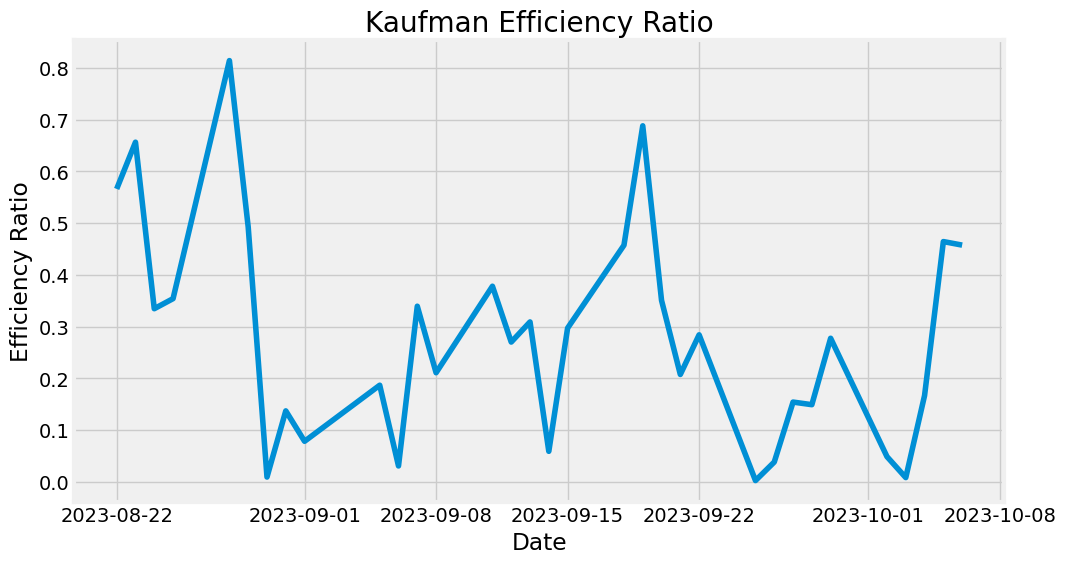

In [72]:

plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
plt.plot(df['eff_ratio'])
plt.title('Kaufman Efficiency Ratio')
plt.xlabel('Date')
plt.ylabel('Efficiency Ratio')
plt.show()